### In this notebook, we'll create data from several functions and see how well the neural network approximates that function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

#### prepare data

In [3]:
def unitsemicirc(x):
    y = np.sqrt(1 - x**2) # returns a unit semicircle
    return y

check that the function really creates a semicircle

In [4]:
xarr = np.linspace(-1,1,100)
yarr = [unitsemicirc(x) for x in xarr]

In [5]:
print(xarr)
print(yarr)

[-1.         -0.97979798 -0.95959596 -0.93939394 -0.91919192 -0.8989899
 -0.87878788 -0.85858586 -0.83838384 -0.81818182 -0.7979798  -0.77777778
 -0.75757576 -0.73737374 -0.71717172 -0.6969697  -0.67676768 -0.65656566
 -0.63636364 -0.61616162 -0.5959596  -0.57575758 -0.55555556 -0.53535354
 -0.51515152 -0.49494949 -0.47474747 -0.45454545 -0.43434343 -0.41414141
 -0.39393939 -0.37373737 -0.35353535 -0.33333333 -0.31313131 -0.29292929
 -0.27272727 -0.25252525 -0.23232323 -0.21212121 -0.19191919 -0.17171717
 -0.15151515 -0.13131313 -0.11111111 -0.09090909 -0.07070707 -0.05050505
 -0.03030303 -0.01010101  0.01010101  0.03030303  0.05050505  0.07070707
  0.09090909  0.11111111  0.13131313  0.15151515  0.17171717  0.19191919
  0.21212121  0.23232323  0.25252525  0.27272727  0.29292929  0.31313131
  0.33333333  0.35353535  0.37373737  0.39393939  0.41414141  0.43434343
  0.45454545  0.47474747  0.49494949  0.51515152  0.53535354  0.55555556
  0.57575758  0.5959596   0.61616162  0.63636364  0.

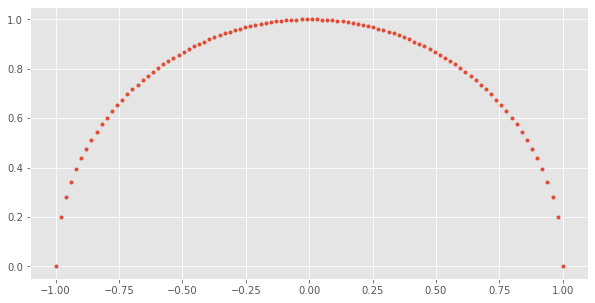

In [6]:
plt.figure(figsize=(10,5))
plt.plot(xarr,yarr,'.')


now let's create the training data

In [7]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

In [8]:
xtrain = np.random.uniform(low=-1,high=1,size=1000)
xtrain.shape

(1000,)

In [9]:
ytrain = np.array(list(map(unitsemicirc, xtrain)))
ytrain.shape

(1000,)

convert arrays to tensors

In [10]:
xtrain = torch.tensor(xtrain, dtype=torch.float32)
ytrain = torch.tensor(ytrain, dtype=torch.float32)

In [11]:
print(xtrain.shape)
print(ytrain.shape)

torch.Size([1000])
torch.Size([1000])


unsqueeze the arrays

In [12]:
xtrain.unsqueeze_(1)
ytrain.unsqueeze_(1)
print(xtrain.shape)
print(ytrain.shape)

torch.Size([1000, 1])
torch.Size([1000, 1])


In [13]:
print(type(xtrain))
print(type(ytrain))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


#### create the model

### model 1

In [14]:
class Model(nn.Module):
    def __init__(self, num_hidden):
        super().__init__()
        self.fc1 = nn.Linear(1, num_hidden)
        self.fc2 = nn.Linear(num_hidden, 1)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x

In [15]:
# parameters
num_hidden = 10

epochs = 5000

In [16]:
model1 = Model(num_hidden)
model1

Model(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)

In [17]:
optimizer = torch.optim.Adam(model1.parameters())
criterion = nn.MSELoss()

In [18]:
running_loss = []
print_every = 500

for i in range(epochs):
    optimizer.zero_grad()
    output = model1(xtrain)
    loss = criterion(output, ytrain)
    loss.backward()
    optimizer.step()
    
    running_loss.append(loss.item())
    if i % print_every == 0:
        print(f'epoch: {i}, loss: {loss}')

epoch: 0, loss: 0.8401637077331543
epoch: 500, loss: 0.037143390625715256
epoch: 1000, loss: 0.010829207487404346
epoch: 1500, loss: 0.006586863659322262
epoch: 2000, loss: 0.006018901709467173
epoch: 2500, loss: 0.005255807191133499
epoch: 3000, loss: 0.004383535124361515
epoch: 3500, loss: 0.0034175566397607327
epoch: 4000, loss: 0.0023731524124741554
epoch: 4500, loss: 0.0019307560287415981


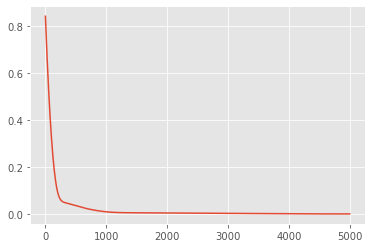

In [19]:
plt.plot(np.arange(0,epochs), running_loss)

let's look at the model state

In [20]:
model1.state_dict()

OrderedDict([('fc1.weight',
              tensor([[-0.0732],
                      [-0.7274],
                      [-0.6181],
                      [ 0.4416],
                      [-0.3162],
                      [ 0.5576],
                      [-0.0552],
                      [-0.2072],
                      [ 1.1526],
                      [-1.5229]])),
             ('fc1.bias',
              tensor([ 0.4381,  0.8109, -0.6276,  0.7300,  0.3181, -0.6368,  0.5951, -0.6270,
                      -0.5623, -0.6175])),
             ('fc2.weight',
              tensor([[ 0.3377,  0.1166, -0.2920,  0.4345,  0.3450,  0.2248,  0.3937, -0.3027,
                       -1.0299, -0.7719]])),
             ('fc2.bias', tensor([0.0660]))])

In [21]:
xtest = np.random.uniform(low=-1,high=1,size=100)

In [22]:
preds = []
truth = []
for x in xtest:
    truth.append(unitsemicirc(x))
    
    x = torch.tensor(x, dtype=torch.float32)
    x = x.unsqueeze(0)
    yhat = model1(x)
    preds.append(yhat.item())
    

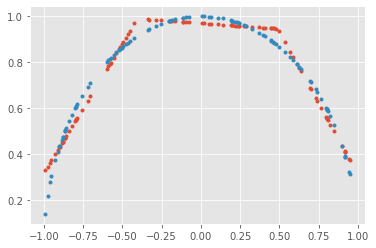

In [23]:
plt.plot(xtest, preds, '.')
plt.plot(xtest, truth,'.')

**inference:** looks quite alright. but maybe with more hidden layers the model will perform better

#### now let's create a function that will train and plot the output. we'll use this function to try a few different numbers of hidden layers

In [24]:
def train_plot(num_hidden, xtrain, ytrain, epochs, model, nonlin):
    m = model(num_hidden)
    optimizer = torch.optim.Adam(m.parameters())
    criterion = nn.MSELoss()
    
    running_loss = []
    print_every = 500

    for i in range(epochs):
        optimizer.zero_grad()
        output = m(xtrain)
        loss = criterion(output, ytrain)
        loss.backward()
        optimizer.step()

        running_loss.append(loss.item())
#         if i % print_every == 0:
#             print(f'epoch: {i}, loss: {loss}')
    
    plt.figure(figsize=(10,10))
    plt.subplot(211)
    plt.plot(np.arange(0,epochs), running_loss)
    plt.title('loss vs epochs')
    plt.suptitle(f'{nonlin}: number of neurons in hidden layer = {num_hidden}', )
    
    xtest = np.random.uniform(low=-1,high=1,size=100)
    preds = []
    truth = []
    for x in xtest:
        truth.append(unitsemicirc(x))

        x = torch.tensor(x, dtype=torch.float32)
        x = x.unsqueeze(0)
        yhat = m(x)
        preds.append(yhat.item())
    plt.subplot(212)
    plt.plot(xtest, preds, '.', label='predictions')
    plt.plot(xtest, truth,'.', label='truth')
    plt.title('predictions and truth vs epochs')
    plt.tight_layout()
    print(m.state_dict)
    

<bound method Module.state_dict of Model(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
  (fc2): Linear(in_features=1, out_features=1, bias=True)
)>


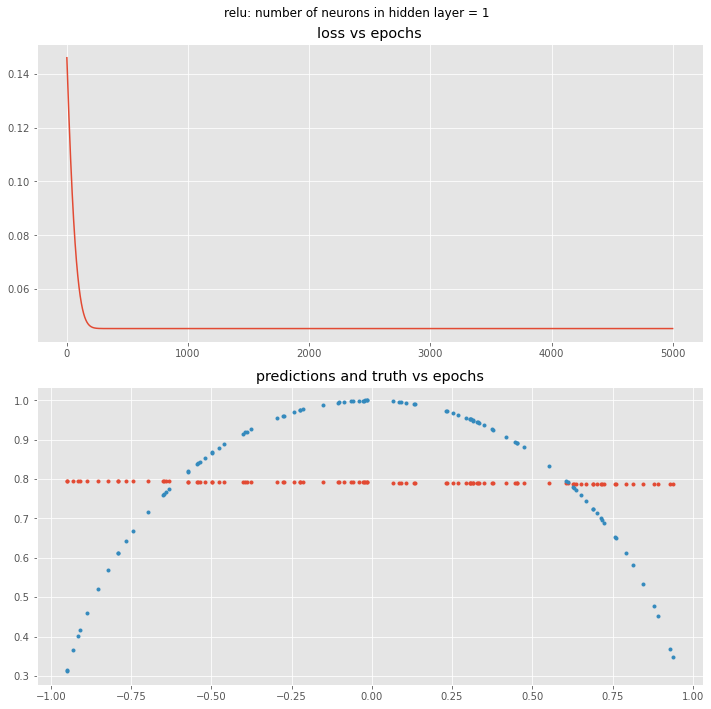

In [25]:
train_plot(1, xtrain, ytrain, 5000, Model, 'relu')

<bound method Module.state_dict of Model(
  (fc1): Linear(in_features=1, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=1, bias=True)
)>


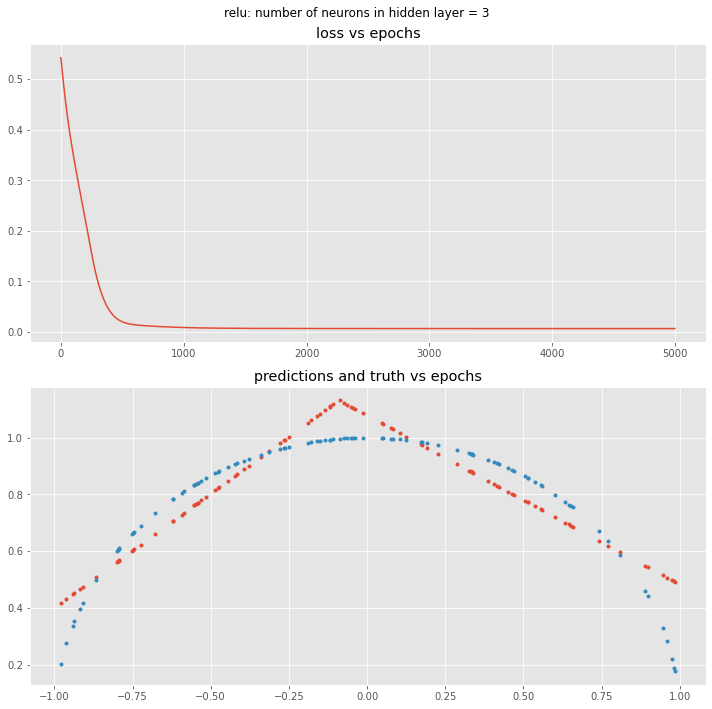

In [39]:
train_plot(3, xtrain, ytrain, 5000, Model, 'relu')

<bound method Module.state_dict of Model(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)>


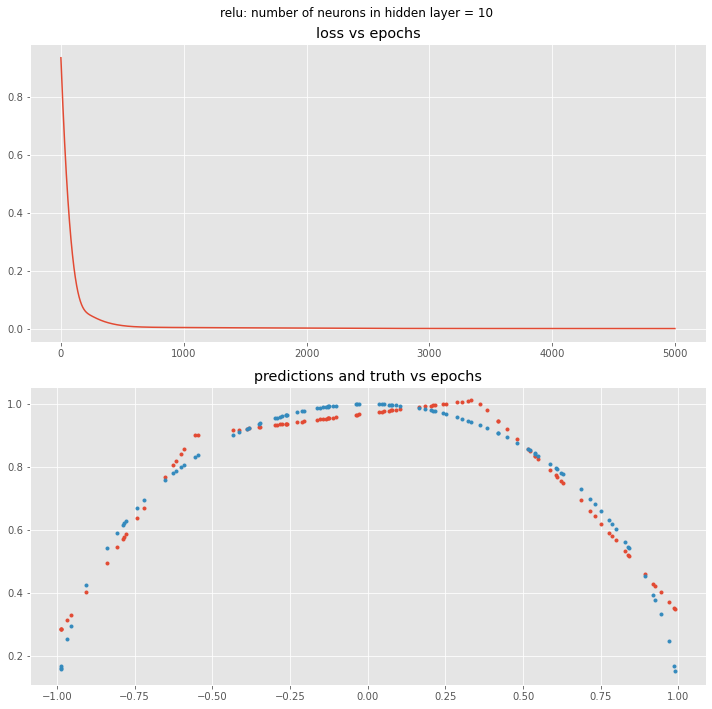

In [27]:
train_plot(10, xtrain, ytrain, 5000, Model, 'relu')

<bound method Module.state_dict of Model(
  (fc1): Linear(in_features=1, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=1, bias=True)
)>


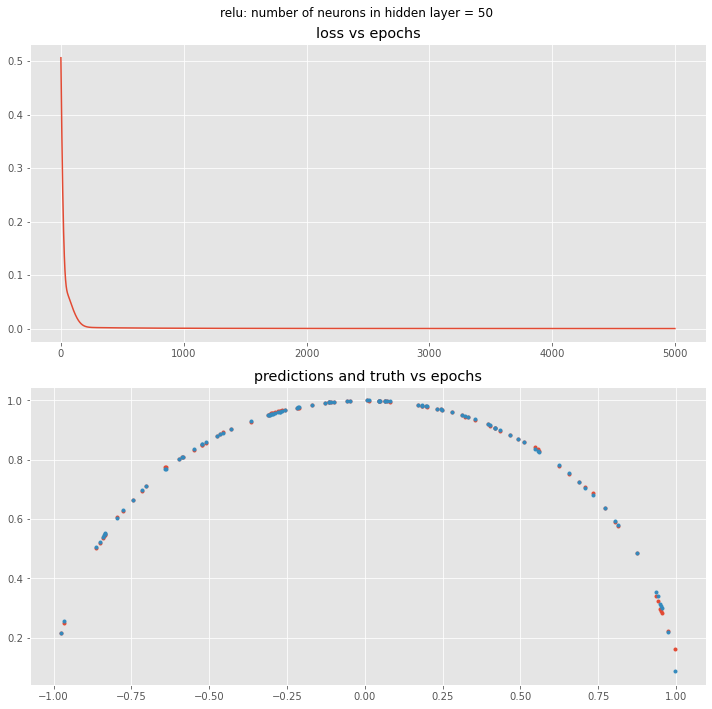

In [28]:
train_plot(50, xtrain, ytrain, 5000, Model, 'relu')

**inference:** Great! the model with 50 hidden layers seem to perform well with 5000 epochs of training.

Now let's create another model that uses another non-linearity and plot the results. we'll use a sigmoid function

### model 2

In [29]:
class Model2(nn.Module):
    def __init__(self, num_hidden):
        super().__init__()
        self.fc1 = nn.Linear(1, num_hidden)
        self.fc2 = nn.Linear(num_hidden, 1)
        
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        
        return x

<bound method Module.state_dict of Model2(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
  (fc2): Linear(in_features=1, out_features=1, bias=True)
)>


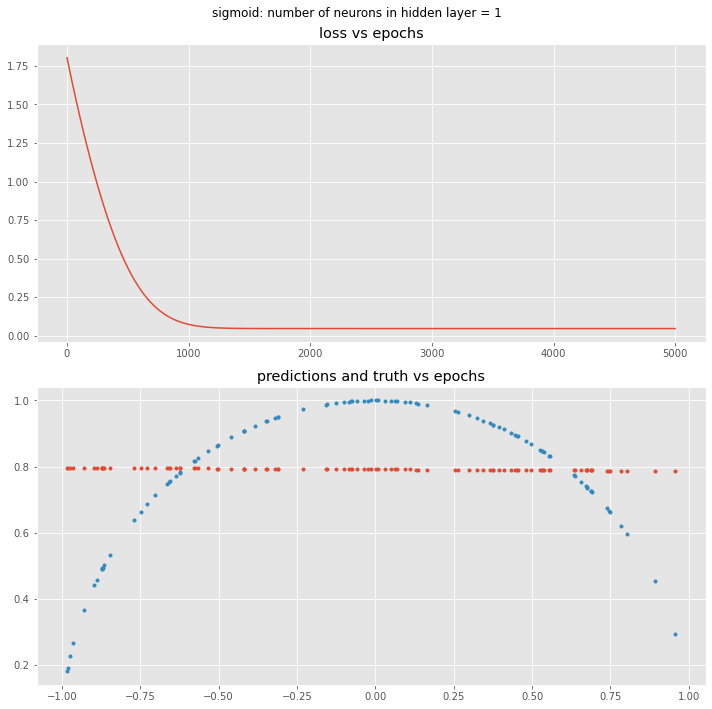

In [30]:
train_plot(1, xtrain, ytrain, 5000, Model2, 'sigmoid')

<bound method Module.state_dict of Model2(
  (fc1): Linear(in_features=1, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=1, bias=True)
)>


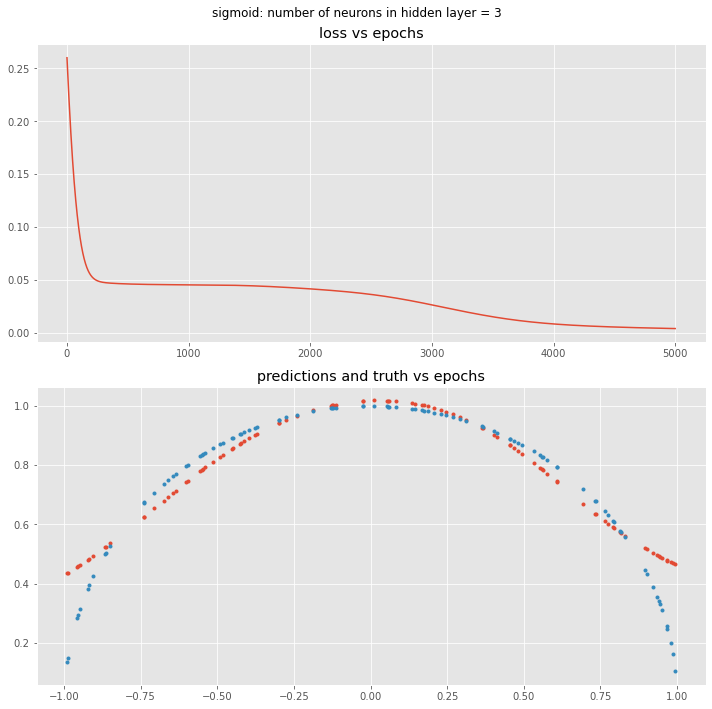

In [31]:
train_plot(3, xtrain, ytrain, 5000, Model2, 'sigmoid')

<bound method Module.state_dict of Model2(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)>


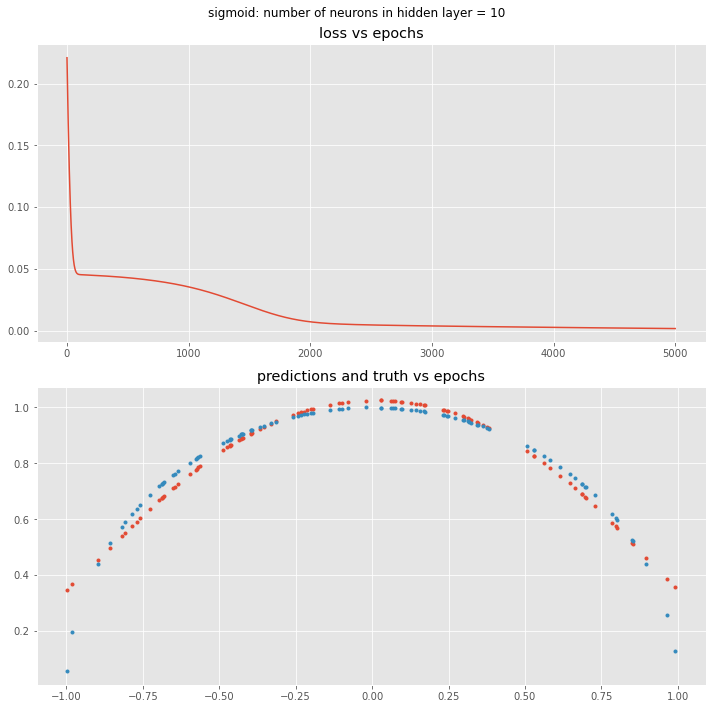

In [32]:
train_plot(10, xtrain, ytrain, 5000, Model2, 'sigmoid')

<bound method Module.state_dict of Model2(
  (fc1): Linear(in_features=1, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=1, bias=True)
)>


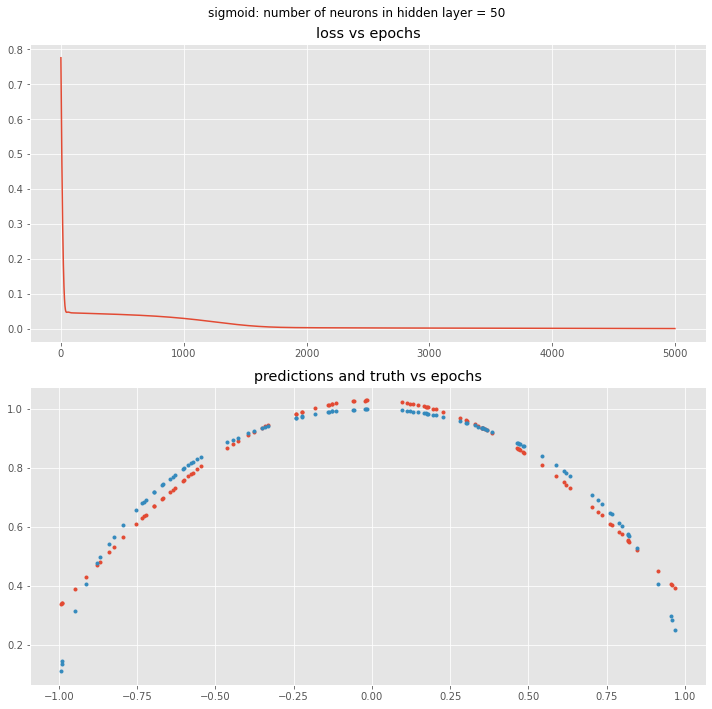

In [33]:
train_plot(50, xtrain, ytrain, 5000, Model2, 'sigmoid')

**inference:** Hmm.. this is interesting. even though the relu output has jagged edges, it seems to perform better with a hidden layer size of 50. and notice the funny looking loss graph for sigmoid, 50 neurons. **keep in mind that with so many neurons, the model may be overfitting** 

Finally, let's create a model that uses tanh as the non-linearity

### model 3

In [34]:
class Model3(nn.Module):
    def __init__(self, num_hidden):
        super().__init__()
        self.fc1 = nn.Linear(1, num_hidden)
        self.fc2 = nn.Linear(num_hidden, 1)
        
    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = self.fc2(x)
        
        return x

<bound method Module.state_dict of Model3(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
  (fc2): Linear(in_features=1, out_features=1, bias=True)
)>


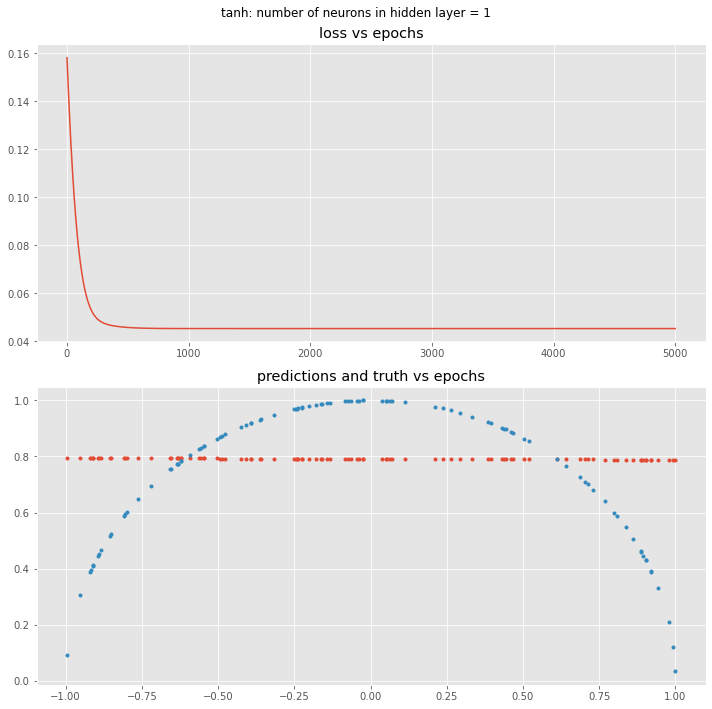

In [35]:
train_plot(1, xtrain, ytrain, 5000, Model3, 'tanh')

<bound method Module.state_dict of Model3(
  (fc1): Linear(in_features=1, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=1, bias=True)
)>


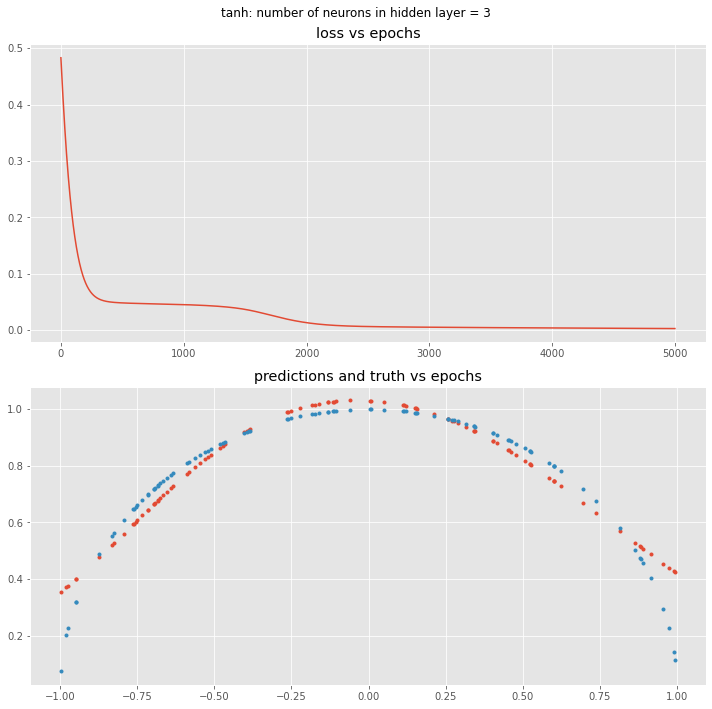

In [36]:
train_plot(3, xtrain, ytrain, 5000, Model3, 'tanh')

<bound method Module.state_dict of Model3(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)>


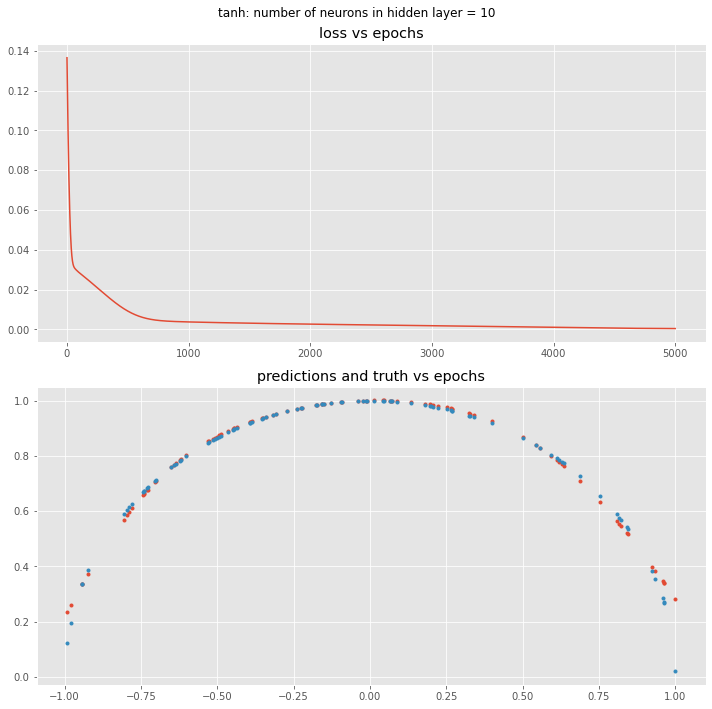

In [37]:
train_plot(10, xtrain, ytrain, 5000, Model3, 'tanh')

<bound method Module.state_dict of Model3(
  (fc1): Linear(in_features=1, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=1, bias=True)
)>


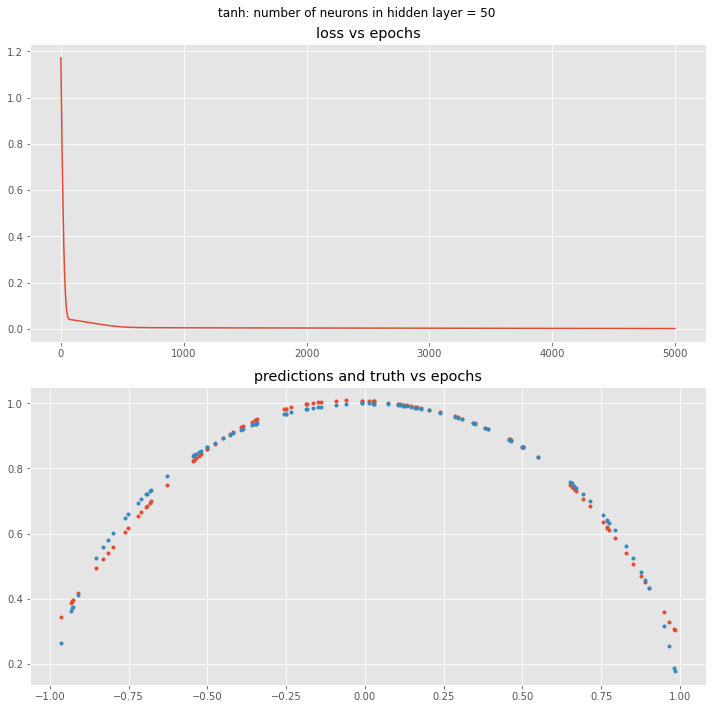

In [38]:
train_plot(50, xtrain, ytrain, 5000, Model3, 'tanh')

**inference:** again, quite interesting. the tanh model seemed to be performing almost identically to the sigmoid model. But the tanh model with more neurons seems to fit the data better than sigmoid models with more neurons.


### NOTE! 

keep in mind that most of these NNs with a larger hidden_size are probably **overfitting**. But the aim of this exercise is just to see how well a model can fit a certain type of data, not to check how well it can generalize.

### Let's test the model on data it hasnt seen

the xtest dataset ranges from -2 to 2, while the xtrain went from -1 to 1 

#### relu model

/tmp/ipykernel_9073/2846769341.py:2: RuntimeWarning: invalid value encountered in sqrt
  y = np.sqrt(1 - x**2) # returns a unit semicircle


<bound method Module.state_dict of Model(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)>


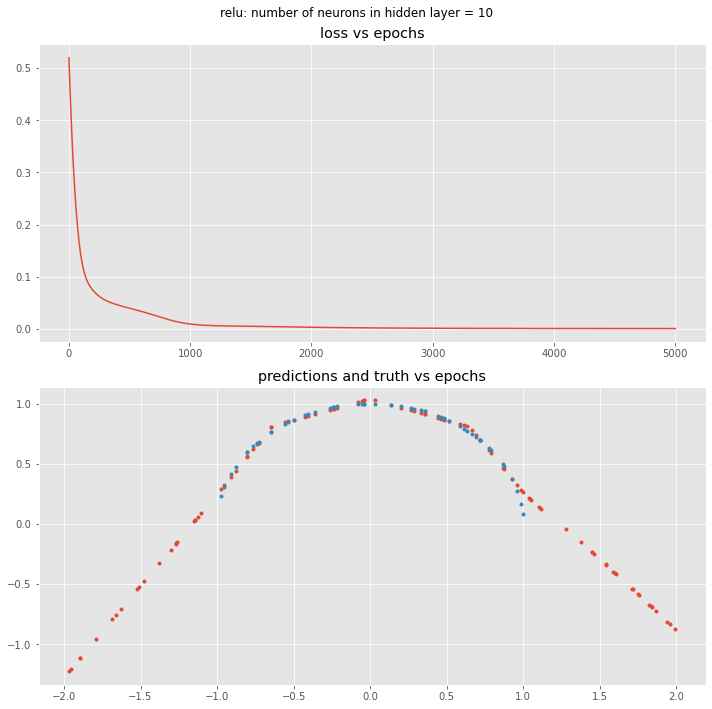

In [45]:
m = Model(num_hidden)
optimizer = torch.optim.Adam(m.parameters())
criterion = nn.MSELoss()

running_loss = []
print_every = 500

for i in range(epochs):
    optimizer.zero_grad()
    output = m(xtrain)
    loss = criterion(output, ytrain)
    loss.backward()
    optimizer.step()

    running_loss.append(loss.item())
#         if i % print_every == 0:
#             print(f'epoch: {i}, loss: {loss}')

plt.figure(figsize=(10,10))
plt.subplot(211)
plt.plot(np.arange(0,epochs), running_loss)
plt.title('loss vs epochs')
plt.suptitle(f'relu: number of neurons in hidden layer = {num_hidden}', )

xtest = np.random.uniform(low=-2,high=2,size=100)
preds = []
truth = []
for x in xtest:
    truth.append(unitsemicirc(x))

    x = torch.tensor(x, dtype=torch.float32)
    x = x.unsqueeze(0)
    yhat = m(x)
    preds.append(yhat.item())
plt.subplot(212)
plt.plot(xtest, preds, '.', label='predictions')
plt.plot(xtest, truth,'.', label='truth')
plt.title('predictions and truth vs epochs')
plt.tight_layout()
print(m.state_dict)


#### sigmoid model

/tmp/ipykernel_9073/2846769341.py:2: RuntimeWarning: invalid value encountered in sqrt
  y = np.sqrt(1 - x**2) # returns a unit semicircle


<bound method Module.state_dict of Model2(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)>


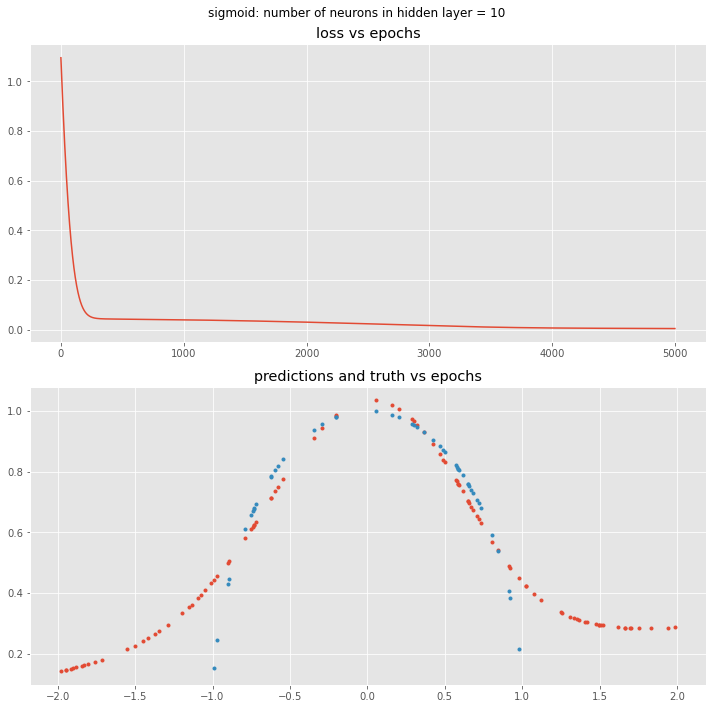

In [46]:
m = Model2(num_hidden)
optimizer = torch.optim.Adam(m.parameters())
criterion = nn.MSELoss()

running_loss = []
print_every = 500

for i in range(epochs):
    optimizer.zero_grad()
    output = m(xtrain)
    loss = criterion(output, ytrain)
    loss.backward()
    optimizer.step()

    running_loss.append(loss.item())
#         if i % print_every == 0:
#             print(f'epoch: {i}, loss: {loss}')

plt.figure(figsize=(10,10))
plt.subplot(211)
plt.plot(np.arange(0,epochs), running_loss)
plt.title('loss vs epochs')
plt.suptitle(f'sigmoid: number of neurons in hidden layer = {num_hidden}', )

xtest = np.random.uniform(low=-2,high=2,size=100)
preds = []
truth = []
for x in xtest:
    truth.append(unitsemicirc(x))

    x = torch.tensor(x, dtype=torch.float32)
    x = x.unsqueeze(0)
    yhat = m(x)
    preds.append(yhat.item())
plt.subplot(212)
plt.plot(xtest, preds, '.', label='predictions')
plt.plot(xtest, truth,'.', label='truth')
plt.title('predictions and truth vs epochs')
plt.tight_layout()
print(m.state_dict)


#### tanh model

/tmp/ipykernel_9073/2846769341.py:2: RuntimeWarning: invalid value encountered in sqrt
  y = np.sqrt(1 - x**2) # returns a unit semicircle


<bound method Module.state_dict of Model3(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)>


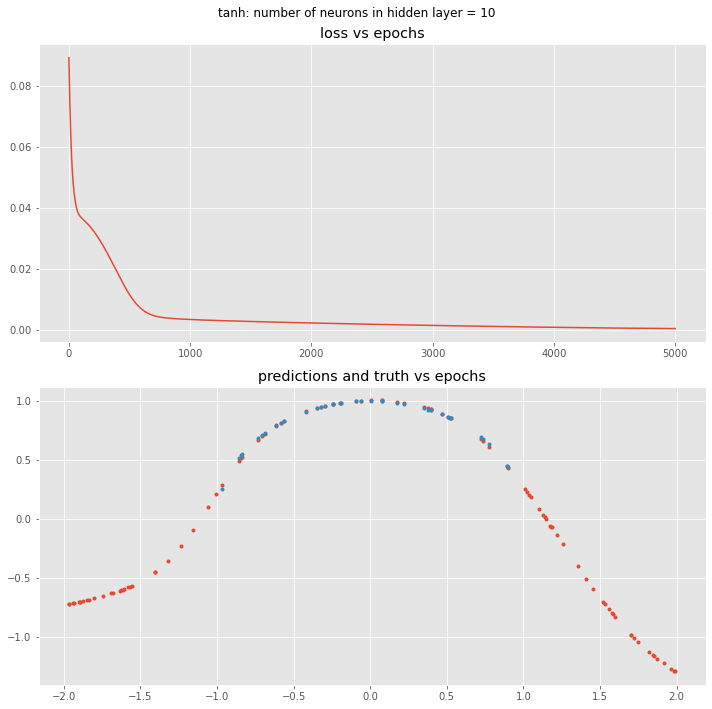

In [47]:
m = Model3(num_hidden)
optimizer = torch.optim.Adam(m.parameters())
criterion = nn.MSELoss()

running_loss = []
print_every = 500

for i in range(epochs):
    optimizer.zero_grad()
    output = m(xtrain)
    loss = criterion(output, ytrain)
    loss.backward()
    optimizer.step()

    running_loss.append(loss.item())
#         if i % print_every == 0:
#             print(f'epoch: {i}, loss: {loss}')

plt.figure(figsize=(10,10))
plt.subplot(211)
plt.plot(np.arange(0,epochs), running_loss)
plt.title('loss vs epochs')
plt.suptitle(f'tanh: number of neurons in hidden layer = {num_hidden}', )

xtest = np.random.uniform(low=-2,high=2,size=100)
preds = []
truth = []
for x in xtest:
    truth.append(unitsemicirc(x))

    x = torch.tensor(x, dtype=torch.float32)
    x = x.unsqueeze(0)
    yhat = m(x)
    preds.append(yhat.item())
plt.subplot(212)
plt.plot(xtest, preds, '.', label='predictions')
plt.plot(xtest, truth,'.', label='truth')
plt.title('predictions and truth vs epochs')
plt.tight_layout()
print(m.state_dict)


**inference:** sigmoid tends to flatten out in the unseen data, while relu and tanh have a higher tendency to continue the trajectory. tanh looks like it lies between sigmoid and relu